
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [3]:
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self.mean, self.std

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [4]:
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = np.zeros(epochs)

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0.0
        for epoch in range(self.epochs):
            y_pred = X @ self.weights + self.bias
            loss = (1 / m) * np.sum((y_pred - y) ** 2)
            loss += self.l2_lambda * np.sum(self.weights ** 2)
            self.history[epoch] = loss
            dw = (2 / m) * X.T @ (y_pred - y) + 2 * self.l2_lambda * self.weights
            db = (2 / m) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self.weights, self.bias, self.history

    def predict(self, X):
        return X @ self.weights + self.bias

In [5]:
# Dataset Creation
np.random.seed(0)
m = 250
n = 2
X = np.random.randn(m, n)
w = np.array([-3.5, 2.9])
b = 1.0
noise = np.random.normal(0.2, 0.3, size = m)
y = X @ w + b + noise

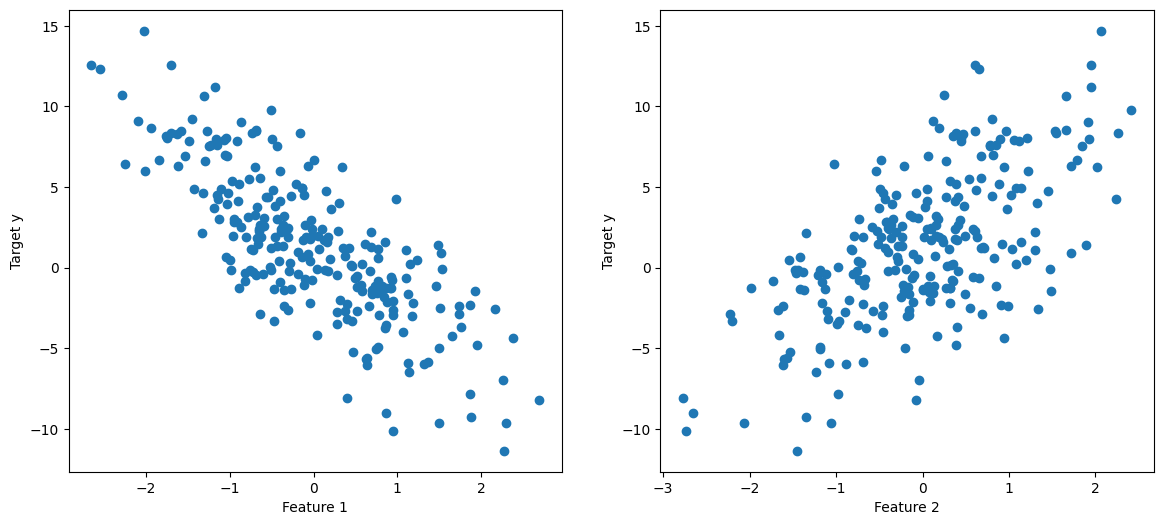

In [7]:
f = X.shape[1]
fig, ax = plt.subplots(1, f, figsize = (14, 6))
for i in range(f):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(f'Feature {i+1}')
    ax[i].set_ylabel('Target y')
plt.show()

In [8]:
X_train, y_train = X[:200], y[:200]
X_test, y_test = X[200:], y[200:]

In [9]:
std_scalar = StandardScalerManual()

In [10]:
X_train_scaled = std_scalar.fit_transform(X_train)
X_test_scaled = std_scalar.transform(X_test)

In [11]:
lr = LinearRegressionManual()

In [12]:
w,b,history = lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [13]:
print("Weights:", w)
print("Bias:", b)

Weights: [-3.49831745  2.83594912]
Bias: 1.4446315836281525


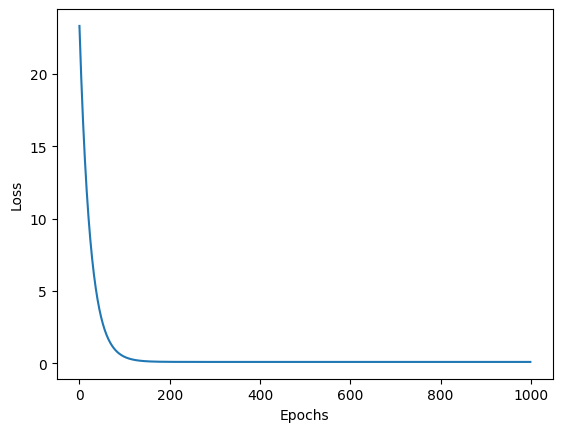

In [15]:
plt.plot(history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

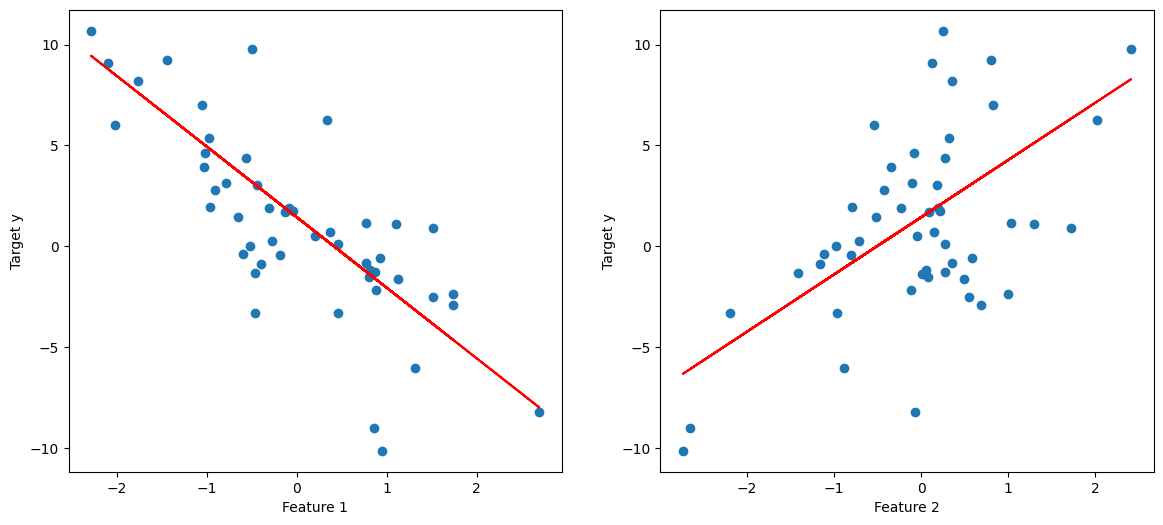

In [19]:
f = X.shape[1]
fig, ax = plt.subplots(1, f, figsize = (14, 6))
for i in range(f):
    ax[i].scatter(X_test[:, i], y_test)
    ax[i].plot(X_test[:,i], X_test[:,i] * w[i]+ b, color="red")
    ax[i].set_xlabel(f'Feature {i+1}')
    ax[i].set_ylabel('Target y')
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [21]:
def sigmoid(z):
    return np.exp(z) / (1 + np.exp(z))

In [22]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = np.zeros(epochs)

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for epoch in range(self.epochs):
            y_pred = sigmoid(np.dot(X, self.weights) + self.bias)
            loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            loss += self.l2_lambda * np.dot(self.weights, self.weights)
            self.history[epoch] = loss
            dw = (1 / m) * np.dot(X.T, (y_pred - y)) + 2 * self.l2_lambda * self.weights
            db = (1 / m) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        return self.weights, self.bias, self.history

    def predict_prob(self, X):
        return sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_prob(X) >= 0.5).astype(int)

In [23]:
# Dataset Creation
np.random.seed(0)
m = 200
n = 2
X = np.random.randn(m, n)
true_weights = np.array([2.5, -0.9])
true_bias = 3.0
z = np.dot(X, true_weights) + true_bias
probs = sigmoid(z)
y = (probs >= 0.5).astype(int)

In [24]:
# Train-test split
X_train, y_train = X[:150], y[:150]
X_test, y_test = X[150:], y[150:]

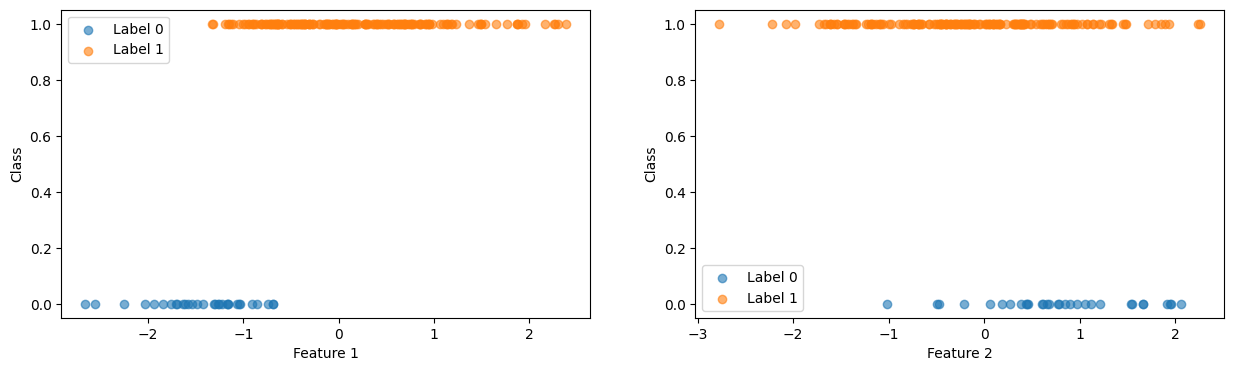

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
for i in range(2):
    ax[i].scatter(X[y == 0][:, i], y[y == 0], label="Label 0", alpha=0.6)
    ax[i].scatter(X[y == 1][:, i], y[y == 1], label="Label 1", alpha=0.6)
    ax[i].set_xlabel(f"Feature {i+1}")
    ax[i].set_ylabel("Class")
    ax[i].legend()
plt.show()

In [27]:
logistic_scalar = StandardScalerManual()
X_train_scale = logistic_scalar.fit_transform(X_train)
X_test_scale = logistic_scalar.transform(X_test)

In [28]:
lr = LogisticRegressionManual(l2_lambda = 0.01)

In [29]:
w, b, history = lr.fit(X_train_scale, y_train)

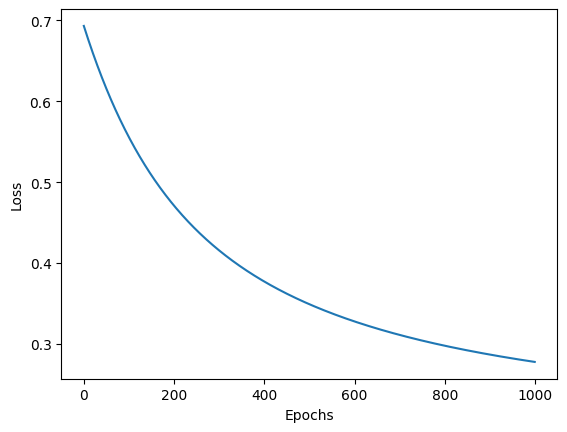

In [30]:
plt.plot(history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [32]:
y_pred = lr.predict(X_test_scale)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 94.0 %



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [33]:
def kmeans_matrix(M, k, max_iters=100):
    m, n = M.shape
    data = M.flatten()
    centroids = np.random.choice(data, size=k, replace=False)

    for iter in range(max_iters):
        labels = np.zeros(len(data), dtype=int)
        for idx, val in enumerate(data):
            distances = np.abs(val - centroids)
            labels[idx] = np.argmin(distances)

        prev_centroids = centroids.copy()
        for cluster_id in range(k):
            cluster_values = data[labels == cluster_id]
            if len(cluster_values) > 0:
                centroids[cluster_id] = np.mean(cluster_values)

        if np.allclose(prev_centroids, centroids, atol=1e-5):
            break
    assignment_table = labels.reshape(m, n)
    cookbook = {i: [] for i in range(k)}
    for idx, cluster_id in enumerate(labels):
        i = idx // n
        j = idx % n
        cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids

In [34]:
# Dataset Creation
np.random.seed(0)
M = np.random.randint(40, 150, size = (10, 10))
print(M)

[[ 84  87 104 107 107 143  49 123  61  76]
 [127 110 128 128  52  98 105 142  79 127]
 [ 86 128 121  77  65 117 112  49  60 120]
 [109 119  87 104 122 139 128  89  69  59]
 [ 59  54  79  72 105  49  97  72  71 114]
 [ 63  75 115  95  68  74  40  40  76  93]
 [ 45  78 144  57 119  44 145  82  98  71]
 [ 41 105 143  81  97  75 142  51  86 122]
 [131  40  54 139  93  52  82 124 115 108]
 [ 46 108  87  43 116 140  92 144 118  55]]


In [35]:
k = 5

In [36]:
assignment_table, cookbook, centroids = kmeans_matrix(M, k)

In [37]:
print("Centroids:", centroids)
print("Assignment Table:\n", assignment_table)

Centroids: [ 78 102  50 142 122]
Assignment Table:
 [[0 0 1 1 1 3 2 4 2 0]
 [4 1 4 4 2 1 1 3 0 4]
 [0 4 4 0 0 4 1 2 2 4]
 [1 4 0 1 4 3 4 0 0 2]
 [2 2 0 0 1 2 1 0 0 4]
 [2 0 4 1 0 0 2 2 0 1]
 [2 0 3 2 4 2 3 0 1 0]
 [2 1 3 0 1 0 3 2 0 4]
 [4 2 2 3 1 2 0 4 4 1]
 [2 1 0 2 4 3 1 3 4 2]]


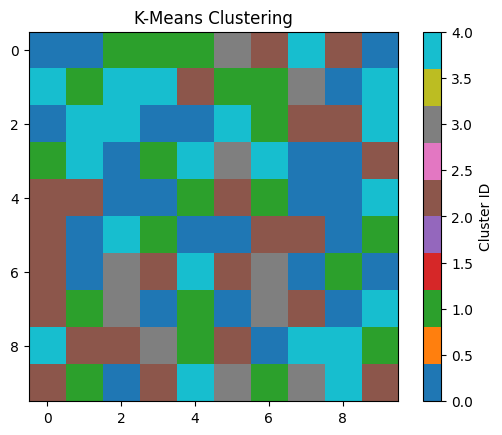

In [39]:
plt.imshow(assignment_table, cmap = "tab10")
plt.colorbar(label = "Cluster ID")
plt.title("K-Means Clustering")
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
